In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt # type: ignore
import polars as pl

In [3]:
from dspy.hdb import get_dataset

In [4]:
RCS = [f"{coin}USDT" for coin in ["BTC", "ETH", "SOL", "DOGE", "LINK"]]
TIMES = ['250601.000100', '250610.215000']

# <font color="grey">Data loading and handling</font>

Data is available in two forms: limit order book (LOB) and data sampled at fixed intervals (for example, seconds). The timestamps are given in nanosecond resolution as Unix timestamps, but the granularity of the data is not that fine. A simple dataloader and some helper function to convert Python datetime objects or strings of the form '240802.1450' into timestamps are provided. The 'book' data contains the bid and ask prices and volumes up to a specified depth (the maximum depth is currently 25).

In [5]:
# At the moment, we are only concerned with data available through the Tardis dataset.
dl = get_dataset("tardis")

####  <a id='chapter1'> <font color="grey">1. Limit Order Book</font></a>

In [22]:
df = dl.load_book("BTCUSDT", TIMES, depth=10)


In [23]:
df.shape

(13714714, 42)

In [16]:
# Add human readable timestamp and mid prices
df = df.ds.add_datetime('ts')
df.head()

ts,ts_local,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,bids[1].price,bids[1].amount,asks[2].price,asks[2].amount,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount,asks[5].price,asks[5].amount,bids[5].price,bids[5].amount,asks[6].price,asks[6].amount,bids[6].price,bids[6].amount,asks[7].price,asks[7].amount,bids[7].price,bids[7].amount,asks[8].price,asks[8].amount,bids[8].price,bids[8].amount,asks[9].price,asks[9].amount,bids[9].price,bids[9].amount,dts
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns]
1748736060000000000,1748736060003568000,104599.6,7.919,104599.5,10.845,104599.7,0.002,104599.4,0.911,104599.8,0.018,104599.3,0.004,104599.9,0.209,104599.0,0.001,104600.0,1.17,104598.7,0.002,104600.1,0.003,104598.6,0.001,104600.5,0.001,104598.3,0.011,104600.7,0.002,104598.2,0.003,104600.8,0.04,104598.0,0.002,104600.9,0.001,104597.8,0.001,2025-06-01 00:01:00
1748736060052000000,1748736060055050000,104599.6,8.564,104599.5,11.028,104599.7,0.002,104599.4,0.911,104599.8,0.018,104599.3,0.004,104599.9,0.209,104599.0,0.001,104600.0,1.17,104598.7,0.002,104600.1,0.005,104598.6,0.001,104600.5,0.001,104598.3,0.011,104600.7,0.002,104598.2,0.003,104600.8,0.04,104598.0,0.002,104600.9,0.001,104597.8,0.001,2025-06-01 00:01:00.052
1748736060103000000,1748736060106040000,104599.6,8.563,104599.5,11.028,104599.7,0.002,104599.4,0.911,104599.8,0.018,104599.3,0.004,104599.9,0.209,104599.0,0.001,104600.0,1.17,104598.7,0.002,104600.1,0.005,104598.6,0.001,104600.5,0.001,104598.3,0.011,104600.7,0.002,104598.2,0.003,104600.8,0.04,104598.0,0.002,104600.9,0.001,104597.8,0.001,2025-06-01 00:01:00.103
1748736060156000000,1748736060159295000,104599.6,8.563,104599.5,11.018,104599.7,0.002,104599.4,0.911,104599.8,0.018,104599.3,0.004,104599.9,0.209,104599.0,0.001,104600.0,1.17,104598.7,0.002,104600.1,0.005,104598.6,0.001,104600.5,0.001,104598.3,0.011,104600.7,0.002,104598.2,0.003,104600.8,0.04,104598.0,0.002,104600.9,0.001,104597.8,0.001,2025-06-01 00:01:00.156
1748736060208000000,1748736060211672000,104599.6,8.563,104599.5,11.008,104599.7,0.002,104599.4,0.911,104599.8,0.018,104599.3,0.004,104599.9,0.209,104599.0,0.001,104600.0,1.17,104598.7,0.002,104600.1,0.005,104598.6,0.001,104600.5,0.001,104598.3,0.011,104600.7,0.002,104598.2,0.003,104600.8,0.04,104598.0,0.002,104600.9,0.001,104597.8,0.001,2025-06-01 00:01:00.208


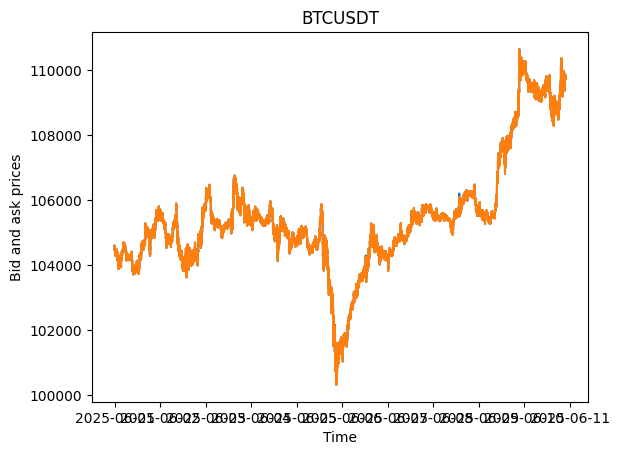

In [17]:
plt.plot(df['dts'], df['asks[0].price'], df['dts'], df['bids[0].price'])
plt.xlabel('Time')
plt.ylabel('Bid and ask prices')
plt.title(f'{RCS[0]}')
plt.show()

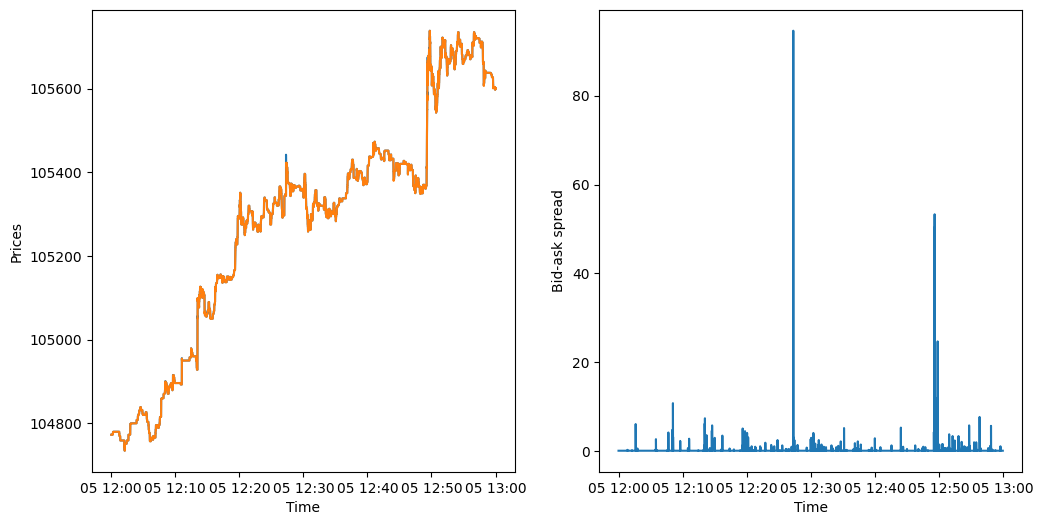

In [18]:
df = dl.load_book("BTCUSDT", ["250605.120000", "250605.130000"], depth=1)
df = df.ds.add_datetime('ts')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(df['dts'], df['asks[0].price'], df['dts'], df['bids[0].price'])
ax[1].plot(df['dts'], df['asks[0].price'] - df['bids[0].price'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Prices')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Bid-ask spread')
plt.show()

####  <a id='chapter2'> <font color="grey">2. Fixed-frequency data (bars)</font></a>

In [20]:
df1 = dl.load_bar("BTCUSDT", ["250605.120000", "250605.150000"], col="mid", freq="1s")

In [21]:
df1

ts,ts_local,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount
i64,i64,f64,f64,f64,f64
1749124800007000000,1749124800010371000,104772.8,16.07,104772.7,1.247
1749124800110000000,1749124800113095000,104772.8,16.072,104772.7,0.823
1749124802387000000,1749124802389955000,104772.8,16.072,104772.7,0.253
1749124802438000000,1749124802441550000,104772.8,16.072,104772.7,0.221
1749124802489000000,1749124802491726000,104772.8,16.072,104772.7,0.212
…,…,…,…,…,…
1749135599753000000,1749135599756404000,104588.5,11.104,104588.4,7.54
1749135599804000000,1749135599807216000,104588.5,9.425,104588.4,7.54
1749135599856000000,1749135599858903000,104588.5,9.415,104588.4,7.54
